## Solving Morphogen Diffusion equation


In [15]:
#Libraries 
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp


#Parameters 

L = 100 #Total distance
n= 200 #number of discrete values of L
dx = L/n
C0 = 0 #Initial value of C (concentration of morphgen)
D = 20 #diffusion coefficient 
dt =  round((dx)**2/(5*D),4)#value of each timepoint
s = 1
#production rate
k=0.1 # degradation rate
t_final = 10/k #Total time
x = np.linspace(start = 0, stop = L, num = n) #numpy array for representing the space axis 
C = np.ones(n)*C0 # numpy array of the initial value of C with a size n
dCdt = np.ones(n)*C0 #empty array to fill 
t = np.arange(0, t_final, dt) #numpy array to for the time axis


# The following rule should be followed when choosing dt or else the equation becomes unstable
# dt <= (dx)**2/(2*D)

# Check that the rule applies 

rule = (dx)**2/(2*D)
if dt > rule:
    print('dt is ', dt, 'it should be smaller than ', round(rule, 4), '.')
else: 
    print('dt value = ', dt, ' is acceptable')




dt value =  0.0025  is acceptable


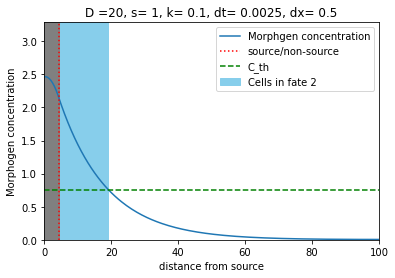

Concentration threshod:  0.7535


In [11]:
#Solve Diffusion equation
for j in range(1, len(t)):
    plt.clf()
    for i in range(1, n-1):
        if i < 0.05*n -1: # percentage of tissue that is a source
            f = 1 #f is the constant multiplied by s to identify source from non-source. 
        else:
            f = 0
        dCdt[i] = D*(C[i+1]- 2*C[i] + C[i-1])/(dx**2) - k*C[i] + s*f
    dCdt[0] = dCdt[1]
    dCdt[n-1] = dCdt[n-2]
    C = C + dCdt*dt
    C_th =C[int(0.05*n)]/exp(1) #Concentration threshold for non-source cells 
    figname = 'D ='+str(D)+', s= ' +str(s)+', k= '+ str(k)+', dt= '+str(round(dt,4))+ ', dx= '+ str(dx)
plt.figure(1)
plt.plot(x, C)
plt.axvline(x = x[int(0.05*n-1)], color = 'r', linestyle = ':') #non-source cell right next to last source cell
plt.axhline(C_th, color = 'green', linestyle= '--')
plt.title(figname)
plt.xlabel('distance from source')
plt.ylabel('Morphogen concentration')
plt.axis([0,L,0, max(C)+max(C/3)])
plt.fill_between(x, y1=0, y2=L, where=C>C_th, color = 'skyblue')
plt.fill_between(x, y1=0, y2=L, where=C>C[int(0.05*n)], color = 'gray')# last cell in source should not be included (?double check?)
plt.legend([ 'Morphgen concentration', 'source/non-source', 'C_th', 'Cells in fate 2'])
plt.show()
print('Concentration threshod: ', round(C_th, 4))


In [ ]:

#Solve Diffusion equation and store plots in file (for video)
for j in range(1, len(t)):
    plt.clf()
    for i in range(1, n-1):
        if i < 0.05*n -1: # percentage of tissue that is a source
            f = 1 #f is the constant multiplied by s to identify source from non-source. 
        else:
            f = 0
        dCdt[i] = D*(C[i+1]- 2*C[i] + C[i-1])/(dx**2) - k*C[i] + s*f
    dCdt[0] = dCdt[1]
    dCdt[n-1] = dCdt[n-2]
    C = C + dCdt*dt
    C_th =C[int(0.05*n)]/exp(1) #Concentration threshold for non-source cells 
    plt.figure(1, figsize=[8, 6])
    figtitle = 'D ='+str(D)+', s= ' +str(s)+', k= '+ str(k)+', dt= '+str(round(dt,4))+ ', dx= '+ str(dx)
    plt.plot(x, C, color = 'b')
    plt.axvline(x = x[int(0.05*n-1)], color = 'dimgrey', linestyle = '--') #non-source cell right next to last source cell
    plt.axhline(C_th, color = 'violet', linestyle= '-')
    plt.title(figtitle)
    plt.xlabel(r'distance from morphogen source [$\mu$m]')
    plt.ylabel(r'Morphogen concentration [molecules/$\mu$m]')
    plt.axis([0,L,0, 3]) #change depending on your plot maxima
    plt.fill_between(x, y1=0, y2=L, where=C<C_th, color = 'white')
    plt.fill_between(x, y1=0, y2=L, where=C>C_th, color = 'lightskyblue')
    plt.fill_between(x, y1=0, y2=L, where=C>C[int(0.05*n)], color = 'gainsboro')# last cell in source should not be included (?double check?)
    #plt.plot(*intersection.xy, 'ro', color = 'w')
    plt.legend([ 'Morphgen', 'Source/Non-source\nBoundary', 'Morphogen Concentration\nThreshold','Cells in Fate 1','Cells in Fate 2','Morphogen Source'], facecolor = 'whitesmoke')
    figname = 'figs_morphogen/fig_' + str(j)
    plt.savefig(figname)

In [7]:
# Define a function based on equation
#In this function the concentration threshold beyond which cells switch to fate 2 are based on the above parameters

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
from shapely.geometry import LineString




def morphogen(D, s, k, L, n, plot = False, C0 = 0, description = False):
    '''
    
    Description:
    
    Function that solves morphogen diffusion equation and returns: 
    
    - the proportion tissue lenght (non-source cells) in fate 2 
    - the list of morphogen concentrations at the the final time point
    
    Arguments: 
    
    D: Diffusion coefficient. int or float
    s: production rate. int or float
    k: degradation rate. int or float 
    L: Tissue length (mm). int or float
    n: number of increments of L. int or float
    plot: bool specifying if equation should be plotted. Default is False
    C0: initial morphogen concentration. Default is zero
    description: bool specifying if additional information should be printed out in output. Default is False
    
    Notes: 
    
    - dt is an abritrarly increment of time = round((dx)**2/(2.1*D),4)
    - the total time is pre-defined as 100 s
    - the percentage of source cells is pre-defined as 5% of the tissue length
    - The threshold value of C (C_th) beyond which a non-source cell is in fate 2 is 0.753 molecules/um**3 defined as C[int(0.05*n)]/exp(1) when D = 20, s = 1, k = 0.1, L = 100, and n = 200. 
    
    Example: 
    
    output = morphogen(D=20, s=1, k=0.1, L=100, n=200, plot=False)
    output[0] returns ratio (float)
    output[1] returns morphgen concentrations at last timepoint (list)
    ----------------------------------------------------------------------------------------------
    '''
    
    dx = L/n
    dt =  round((dx)**2/(5*D),4)#value of each timepoint
    t_final = 100 #Total time
    C0=0
    x = np.linspace(start = 0, stop = L, num = n) #numpy array for representing the space axis 
    C = np.ones(n)*C0 # numpy array of the initial value of C with a size n
    dCdt = np.ones(n)*C0 #empty array to fill 
    t = np.arange(0, t_final, dt) #numpy array to for the time axis

    for j in range(1, len(t)):
        for i in range(1, n-1):
            if i < 0.05*n -1: # percentage of tissue that is a source
                f = 1 #f is the constant multiplied by s to identify source from non-source. 
            else:
                f = 0
            dCdt[i] = D*(C[i+1]- 2*C[i] + C[i-1])/(dx**2) - k*C[i] + s*f
        dCdt[0] = dCdt[1]
        dCdt[n-1] = dCdt[n-2]
        C_prev = C #Store the previous morphogen concentration 
        C = C + dCdt*dt
        C_ss = C[0] - C_prev[0] #Find the differenrce between the current morphogen concentration and the previous one at at x = 0 
        if C_ss < 1e-6: # Find out the time when steady state is reached and display 
            steady_state = 'Steady state reached at '+ str(round(j*dt, 3)) + 's of '+str(t_final)+ 's'
            break
    C_th = 0.753 
    C_th_line = [C_th]*n #Line that represents C_th (needed because LineString does not take numbers)
    line1 = LineString(np.column_stack((x, C )))
    line2 = LineString(np.column_stack((x, C_th_line)))
    intersection = line1.intersection(line2)
    #Find coordinates of intersection between two lines
    C_x, C_y = intersection.xy 
    #Find the lenght of non-source tissue and tissue in fate 2(blue)
    len_non_source = x[n-1] -x[int(0.05*n-1)]
    len_fate2 = C_x[0] - x[int(0.05*n-1)]
    ratio = len_fate2/len_non_source
    if plot == True:
        plt.figure(1, figsize=[8, 6])
        figname = 'D ='+str(D)+', s= ' +str(s)+', k= '+ str(k)+', dt= '+str(round(dt,4))+ ', dx= '+ str(dx)
        plt.plot(x, C, color = 'b')
        plt.axvline(x = x[int(0.05*n-1)], color = 'dimgrey', linestyle = '--') #non-source cell right next to last source cell
        plt.axhline(C_th, color = 'violet', linestyle= '-')
        plt.title(figname)
        plt.xlabel(r'distance from morphogen source [$\mu$m]')
        plt.ylabel(r'Morphogen concentration [molecules/$\mu$m]')
        plt.axis([0,L,0, max(C)+max(C/3)])
        plt.fill_between(x, y1=0, y2=L, where=C<C_th, color = 'white')
        plt.fill_between(x, y1=0, y2=L, where=C>C_th, color = 'lightskyblue')
        plt.fill_between(x, y1=0, y2=L, where=C>C[int(0.05*n)], color = 'gainsboro')# last cell in source should not be included (?double check?)
        #plt.plot(*intersection.xy, 'ro', color = 'w')
        plt.legend([ 'Morphgen', 'Source/Non-source\nBoundary', 'Morphogen Concentration\nThreshold','Cells in Fate 1','Cells in Fate 2','Morphogen Source'], facecolor = 'whitesmoke')
        plt.show()
    if description == True:
        print(steady_state)
        print('Concentration threshold: ', C_th)
        print("Fate 2 length/ total non-source length: ", round(ratio*100, 3), '%', sep = '' )
        print('-------------------------------------------------------------------------------')
    return [ratio, C]



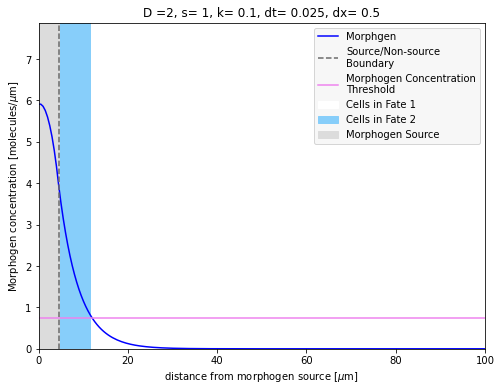

Steady state reached at 83.65s of 100s
Concentration threshold:  0.753
Fate 2 length/ total non-source length: 7.787%
-------------------------------------------------------------------------------


In [8]:
#Example
output_1 = morphogen(D=2, s=1, k=0.1, L=100, n=200, plot=True, description=True)


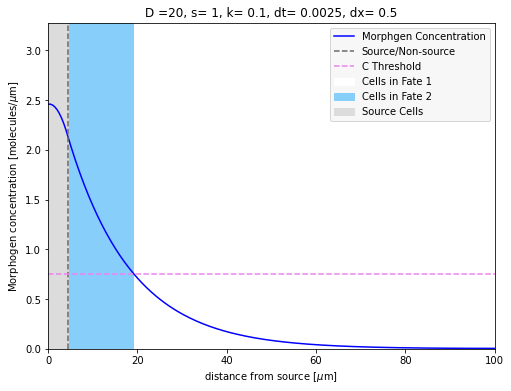

Steady state reached at 51.663s of 100s
Concentration threshold:  0.753
Fate 2 length/ total non-source length: 15.357%
-------------------------------------------------------------------------------


In [20]:
output_2 = morphogen(D=20, s=1, k=0.1, L=100, n=200, plot=True, description=True)

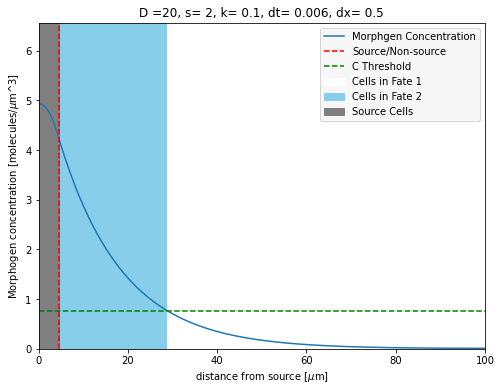

Steady state reached at 66.12s of 100s
Concentration threshold:  0.753
Fate 2 length/ total non-source length: 25.717%
-------------------------------------------------------------------------------


In [75]:
output_3 = morphogen(D=20, s=2, k=0.1, L=100, n=200, plot=True, description=True)

In [14]:
# Define a function to test parameters effect on cell fate 
def morphogen_ratio(x, parameter, D=0, s=0, k=0, L=0, n=0, C0=0):
    '''
    Description:
    
    Function that plots the proportion of tissue length in fate 2 versus the 3 parameters. 
    User inputs a list of different values of parameter of interest and fills the constant values of the other parameters and arguments.  
    
    Arguments:
    x: list containing different values for desired parameters
    D: Diffusion coefficient. int or float
    s: production rate. int or float
    k: degradation rate. int or float 
    L: Tissue length (mm). int or float
    n: number of increments of L. int or float
    C0: initial morphogen concentration. Default is zero
    Parameter: Specify the parameter you want to test
                - 'D' for diffusion coefficient 
                - 's' for production rate
                - 'k' for degradation rate
    

     
    Notes:
    
    - Default values of all arguments is zero. If they are not specified by the user, the function will show error. 
    - This function depends on the function morphogen(). Use help(morphogen) for more information. 
    
    Example:
    
    lis = [1, 3, 5, 10, 15, 20]
    morphogen_ratio(x = lis, s=0.1,k=0.7, L=100, n=200, parameter = 'D')
    ----------------------------------------------------------------------------------------------


    '''
    ratio_list = []
    for i in x:
        if parameter == 'D':
            out = morphogen(D =i, s=s, k=k, L=L, n=n)
            param = 'Diffusion Coefficient'
            unit = r' [$\mu$m/s]'
        if parameter == 's':
            out = morphogen(D =D, s=i, k=k, L=L, n=n)
            param = 'Production Rate'
            unit =  r' [molecules/$\mu$m^3.s]'
        if parameter == 'k':
            out = morphogen(D =D, s=s, k=i, L=L, n=n)
            param = 'Degradation Rate'
            unit = " [1/s]"
        ratio_list.append(out[0])
    x_title = param + unit
    plt.plot(x, ratio_list)
    title = ' Proportion of tissue length in fate 2 versus ' + param
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('fate 2 length/ total non-source length')

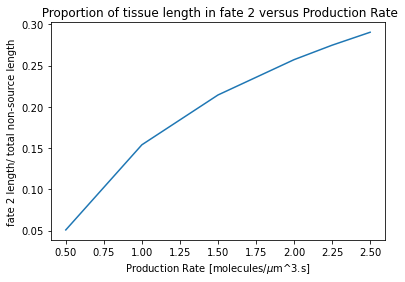

In [15]:
# Varying values of s
lis = [2.5, 2.25, 2, 1.5, 1, 0.5]
morphogen_ratio(x = lis, D = 20, k=0.1, L=100, n=200, parameter = 's')

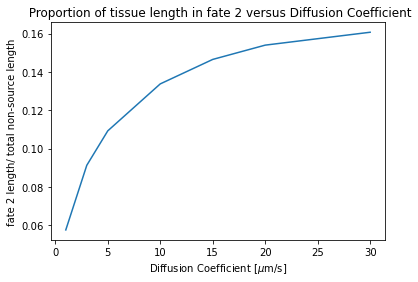

In [16]:
# Varying values of D
lis = [1, 3, 5, 10, 15, 20, 30]
morphogen_ratio(x = lis, s=1,k=0.1, L=100, n=200, parameter = 'D')

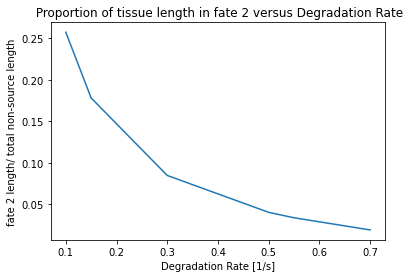

In [17]:
# Varying values of k
lis = [0.1, 0.15, 0.3,0.5,0.55, 0.7]
morphogen_ratio(x = lis, D = 20, s=2, L=100, n=200, parameter = 'k')